# Gradians modszer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

A = np.array([[2, 1], [1, 3]])
b = np.array([1, 2]) 
x0 = np.array([0, 0])


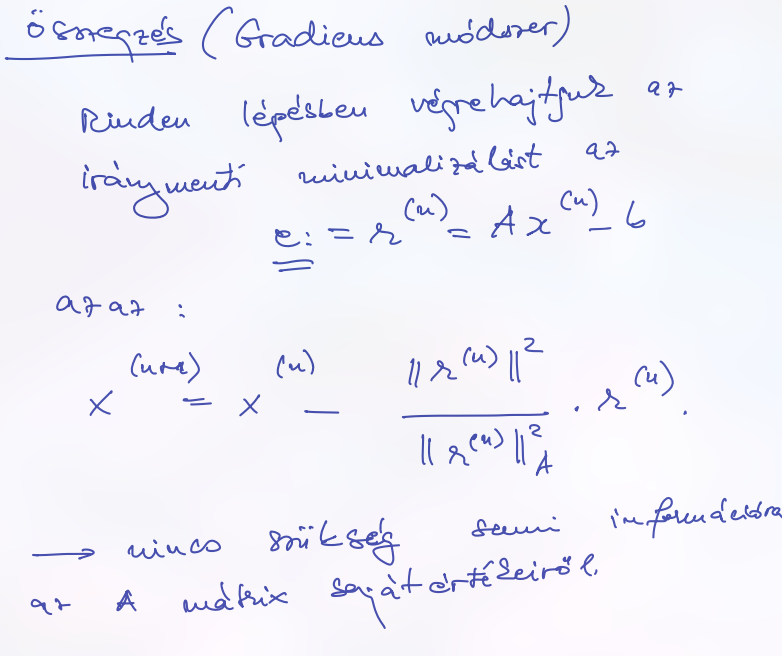

In [ ]:

def gradient_method(A, b, x0, max_iter=20, eps=1e-6):
    
    x = x0.copy()
    x_history = [x.copy()]
    r_history = []
    
    for i in range(max_iter):
        r = A @ x - b
        
        r_norm_squared = np.dot(r, r)
        r_history.append(np.sqrt(r_norm_squared))
        
        if np.sqrt(r_norm_squared) < eps:
            break
        
        r_A_norm_squared = np.dot(r, A @ r)
        
        a = r_norm_squared / r_A_norm_squared
        
        x = x - a * r
        x_history.append(x.copy())
    
    return np.array(x_history), np.array(r_history)

x_history, r_history = gradient_method(A, b, x0)
print(f"Solution found: {x_history[-1]}")
print(f"Iterations: {len(x_history)-1}")
print(f"Final residual: {r_history[-1]}")


Solution found: [0.2 0.6]
Iterations: 20
Final residual: 2.220446049250313e-16


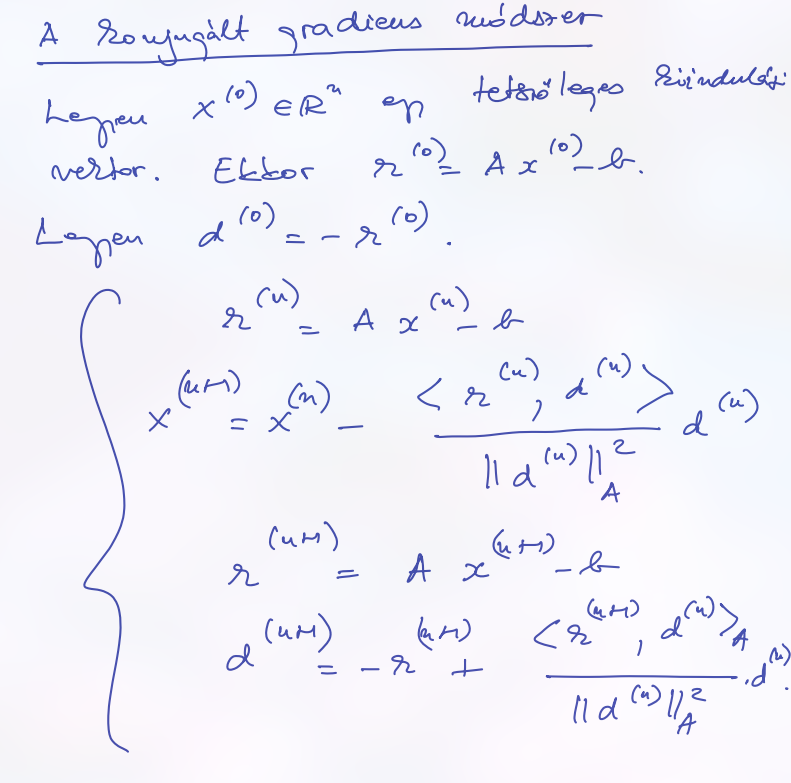

In [31]:
def gradient_conjug(A, b , x0):
    x = x0.copy()
    r = A @ x - b
    d = -r
    x_history = [x.copy()]
    r_history = []
    
    for i in range(20):
        r_norm_squared = np.dot(r, r)
        r_history.append(np.sqrt(r_norm_squared))
        
        if np.sqrt(r_norm_squared) < 1e-6:
            break
        
        Ap = A @ d
        alpha = r_norm_squared / np.dot(d, Ap)
        
        x = x+ alpha * d
        r_new = A @ x - b
        beta = np.dot(r_new, r_new) / r_norm_squared
        
        d = -r_new + beta * d
        r = r_new
        x_history.append(x.copy())
    
    return np.array(x_history), np.array(r_history)
x_history_cg, r_history_cg = gradient_conjug(A, b, x0)
print(f"Solution found: {x_history_cg[-1]}")
print(f"Iterations: {len(x_history_cg)-1}")
print(f"Final residual: {r_history_cg[-1]}")



Solution found: [0.2 0.6]
Iterations: 2
Final residual: 4.965068306494546e-16


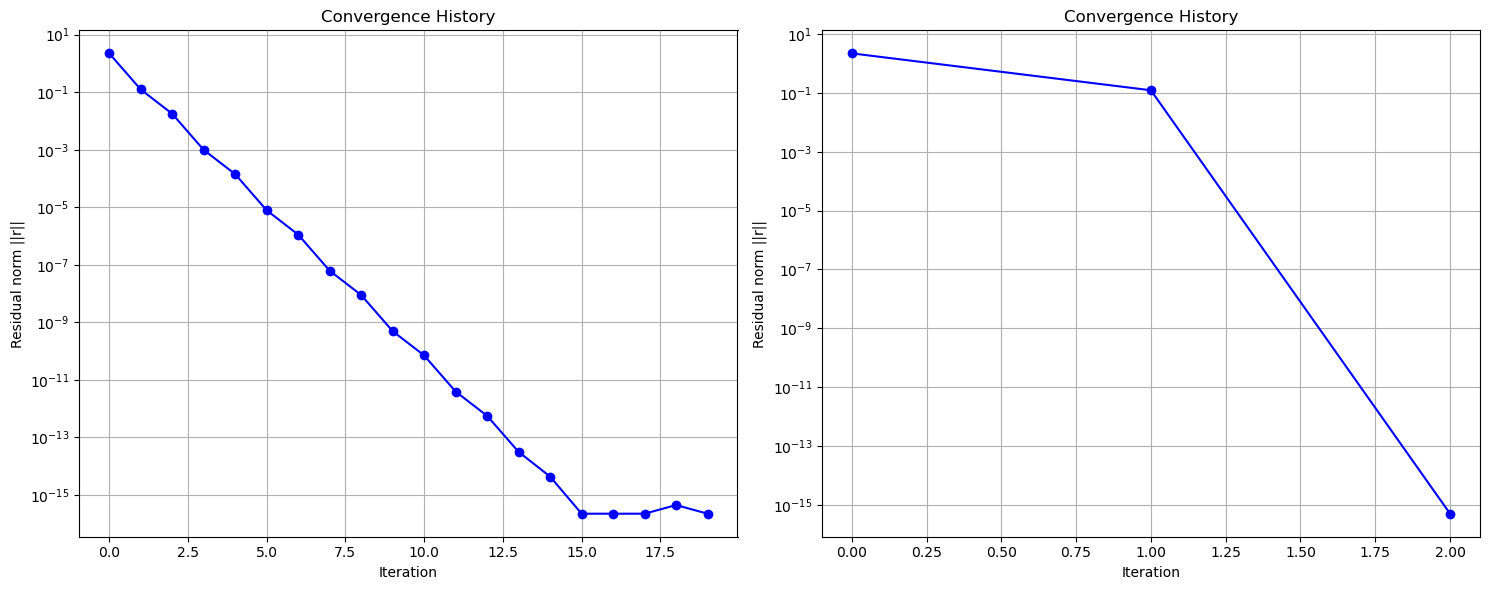

In [ ]:

# Create visualization
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 6))


# Plot convergence
def plot_convergence(ax : plt.Axes):
    ax.semilogy(range(len(r_history)), r_history, 'bo-')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Residual norm ||r||')
    ax.set_title('Convergence History')
    ax.grid(True)

def plot_convergence_conj(ax):
    ax.semilogy(range(len(r_history_cg)), r_history_cg, 'bo-')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Residual norm ||r||')
    ax.set_title('Convergence History')
    ax.grid(True)

plot_convergence(ax1)
plot_convergence_conj(ax2)

plt.tight_layout()
plt.show()